<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

**Question 1:** Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

        2.1  Budget vs. Profit
             - General trend
             - Top 100 performers trend
             
**Question 2:** What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

        2.2  Genre vs. Profit
        
             - General distribution vs. Top 100 distribution
             - Top 100 performers vs. profit
             - Top 100 performers vs. budget
             
        2.3  Source vs. Profit
        
             - General distribution vs. Top 100 distribution
             - Top 100 performers vs. profit
             - Top 100 performers vs. budget

        2.4  Creative Type vs. Profit
        
             - General distribution vs. Top 100 distribution
             - Top 100 performers vs. profit
             - Top 100 performers vs. budget
             
        2.5  Production Method vs. Profit
        
             - General distribution vs. Top 100 distribution
             - Top 100 performers vs. profit
             - Top 100 performers vs. budget
             
**Question 3:** Can popularity or words of mouth, in term of rating and number of votes, and the popularity of a studio affect the performance of a movie?

        2.6 Rating & number of votes vs. Profit
             
             - Top 100 performers trend
             
        2.6.a Rating & number of votes vs. Genre
        
        2.6.b Rating & number of votes vs. Source
        
        2.6.c Rating & number of votes vs. Creative Type
        
        2.6.d Rating & number of votes vs. Production Method


# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [139]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [27]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

### Production Budget 

In [121]:
#production_budget distribution for all movies
y_values = full_df['production_budget'].sort_values(ascending=False)
x_values = y_values.index

#remove scientific notation
y_values.describe().apply(lambda x: format(x, 'f'))

count          629.000000
mean      68086486.486486
std       61577082.023022
min         100000.000000
25%       24000000.000000
50%       45000000.000000
75%       95000000.000000
max      365000000.000000
Name: production_budget, dtype: object

This is a huge range, it takes as low as $100,000 and as high as 365M to create a movie.

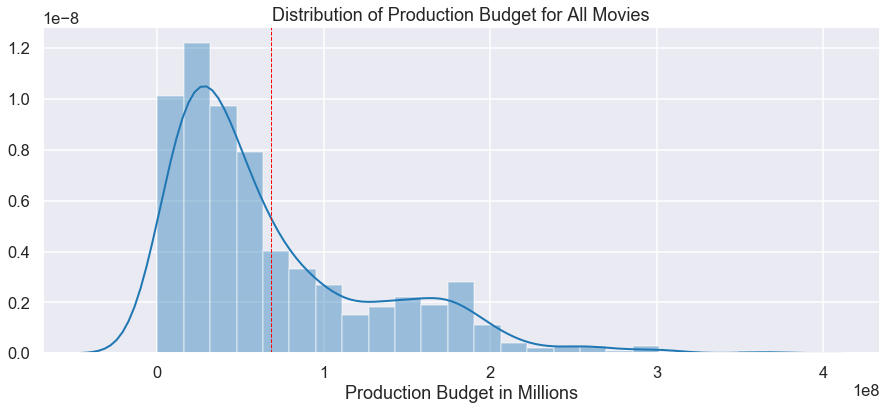

In [127]:
#plot production_budget for all movies
plt.figure(figsize = (15, 6))
sns.distplot(full_df['production_budget'], label = 'General')

#set labels
plt.title('Distribution of Production Budget for All Movies')
plt.xlabel('Production Budget in Millions')

#draw mean()
plt.axvline(full_df['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#show
plt.show()

In [30]:
#save
plt.savefig('production_budget_distribution')

<Figure size 432x288 with 0 Axes>

Production budget is heavily skewed. With most of the movies budgets fall in the <50M range.  

Let's obtain a list of top 100 investment so we can later compare this list with top 100 performers and see if they match.

In [128]:
#list of top 100 investments
top_100_budget = full_df[['movie', 
                          'production_budget']].sort_values(by = 'production_budget', 
                                                            ascending = False)[:100]
top_100_budget.head(20)

,movie,production_budget
0,Avengers: Age of Ultron,365000000
3,Spectre,300000000
1,Avengers: Infinity War,300000000
2,Justice League,300000000
5,Solo: A Star Wars Story,275000000
6,John Carter,263700000
9,Batman v Superman: Dawn of Justice,263000000
7,Tangled,260000000
8,Captain America: Civil War,250000000
11,The Hobbit: The Desolation of Smaug,250000000


### Profit

Let's take a look at profits generated domestically, internationally, and worldwide.

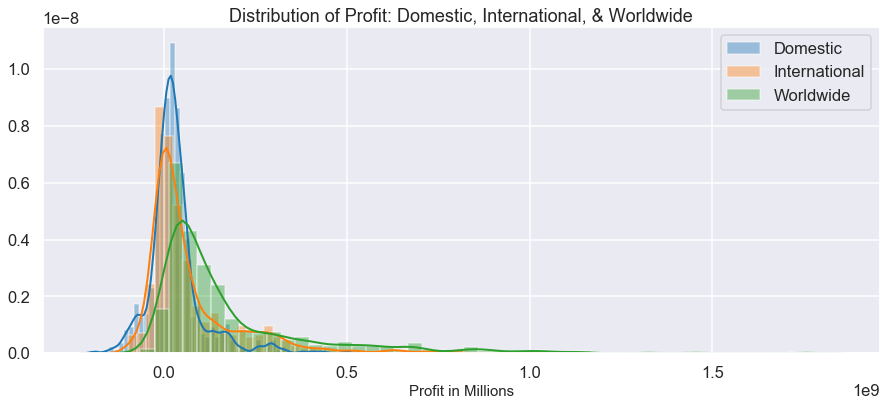

In [32]:
#plot distibution of profit
plt.figure(figsize = (15, 6))

#domestic profit
ax1 = sns.distplot(full_df['domestic_profit'], label = 'Domestic')

#international profit
ax2 = sns.distplot(full_df['international_profit'], label = 'International')

#worldwide profit
ax3 = sns.distplot(full_df['worldwide_profit'], label = 'Worldwide')

#set labels
plt.legend()
plt.title('Distribution of Profit: Domestic, International, & Worldwide')
plt.xlabel('Profit in Millions', fontsize = 15)

#show
plt.show()

In [33]:
#save
plt.savefig('profit_distribution.png')

<Figure size 432x288 with 0 Axes>

We are interested in worldwide_profit as this reflect the total profit earned. If we have more time, we can analyze each of the attribute with profit generated domestically vs. internationally to see if a movie performs better domestically than internationally and vice versa and why that is.

In [129]:
#list of top 100 performers
top_100_profit = full_df[['movie', 'worldwide_profit', 
                          'domestic_profit', 'international_profit']].sort_values(by = 'worldwide_profit', 
                                                                                  ascending = False)[:100]
top_100_profit.head(20)

,movie,worldwide_profit,domestic_profit,international_profit
1,Avengers: Infinity War,1744540523,378815482,1065725041
16,Jurassic World,1454943967,437270625,802673342
31,Furious 7,1327179709,163007020,974172689
59,Jurassic World: Fallen Kingdom,1138334005,247719760,720614245
21,Black Panther,1136498912,500059566,436439346
207,Minions,1085631140,262045770,749585370
22,Incredibles 2,1042805359,408581744,434223615
0,Avengers: Age of Ultron,1031099202,94005868,572093334
25,Iron Man 3,1015392272,208992272,606400000
12,The Fate of the Furious,986703796,-24235235,760939031


Comparing top_10_budget movies and top_100_profit movies, they are not the same list. For the first 20 movies, only 8 out of 20 top_budget movies made it into top_profit list. So higher investment into production does not necessarily always mean higher profit. 

### Production Budget vs. Worldwide Profit

Let's look at how the top 100 performers do differently than the rest.

In [35]:
#create sub dataframe for production_budget and worldwide_profit of top 100 performers
budget_vs_100_profit = full_df[['production_budget', 
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]
budget_vs_100_profit.head()

,production_budget,worldwide_profit
1,300000000,1744540523
16,215000000,1454943967
31,190000000,1327179709
59,170000000,1138334005
21,200000000,1136498912


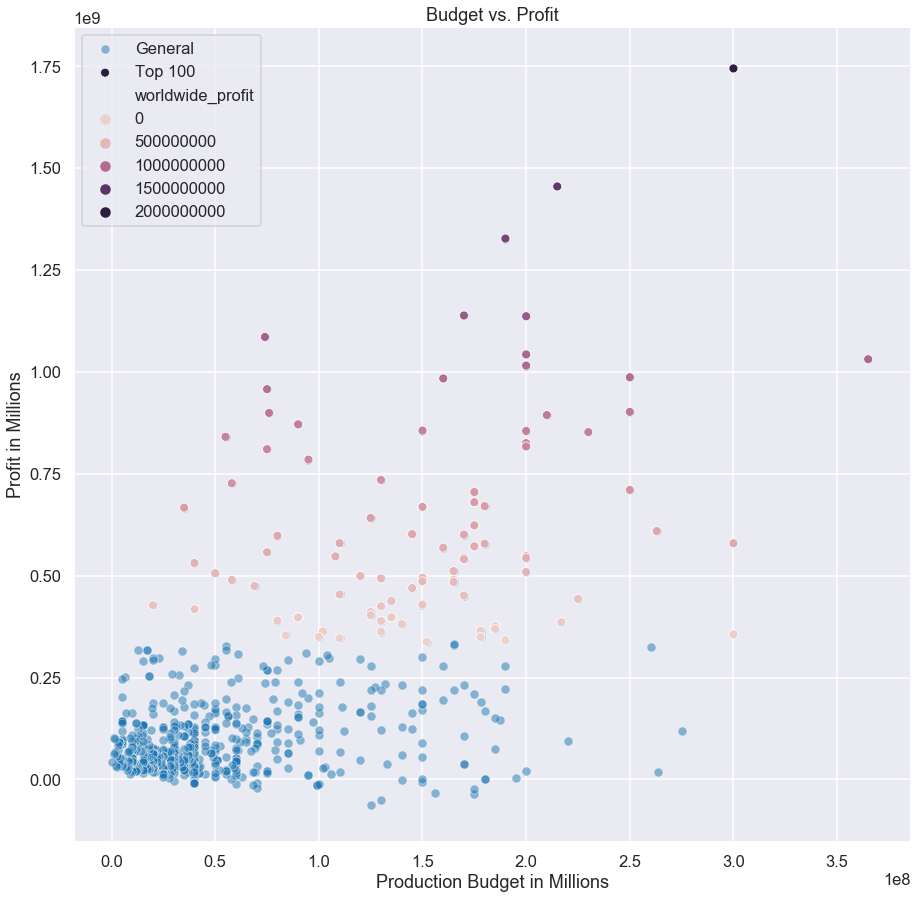

In [192]:
#plot 'production_budget' vs. 'worldwide_profit' for general trend and top 100 performers trend
plt.figure(figsize = (15, 15))

#general
ax1 = sns.scatterplot(x = full_df['production_budget'], 
                      y = full_df['worldwide_profit'],
                      label = 'General', alpha = 0.5)
#top 100
ax2 = sns.scatterplot(x = budget_vs_100_profit['production_budget'], 
                      y = budget_vs_100_profit['worldwide_profit'],
                      hue = budget_vs_100_profit['worldwide_profit'],
                      label = 'Top 100')

#set labels
plt.legend(loc='upper left')
plt.title('Budget vs. Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Profit in Millions')

#show
plt.show()

In [193]:
#save
plt.savefig('budget_vs_profit.png')

<Figure size 432x288 with 0 Axes>

In [38]:
#compare production_budget between general trend and top 100 sucessful trend
print('The average production budget in general is', 
      full_df['production_budget'].mean(), 'million dollars.')
print('The average production budget in top 100 performers is', 
      budget_vs_100_profit['production_budget'].mean(), 'million dollars.')

The average production budget in general is 68086486.48648648 million dollars.
The average production budget in top 100 performers is 150670000.0 million dollars.


In [39]:
#compare worldwide_profit between general trend and top 100 sucessful trend
print('The average worldwide_profit in general is', 
      full_df['worldwide_profit'].mean(), 'million dollars.')
print('The average worldwide_profit in top 100 performers is', 
      budget_vs_100_profit['worldwide_profit'].mean(), 'million dollars.')

The average worldwide_profit in general is 179064870.3799682 million dollars.
The average worldwide_profit in top 100 performers is 624684416.28 million dollars.


This plot tells us the same thing as above, higher investment does not always guarantee higher profit and many of the lower budget movies found success regardless of the initial investment. 
It is likely that the minimum budget requirement to create a movie is $150M, which is the mean average of top 100 performers' production budget. Let's investigate.

### Production Budget Range vs. Profit

In [194]:
#create sub dataframe for budget_range and worldwide_profit of top 100 performers
budget_range_vs_100_profit = full_df[['budget_range',
                                      'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                       ascending = False)[:100]
budget_range_vs_100_profit.head()

,budget_range,worldwide_profit
1,>200M,1744540523
16,>200M,1454943967
31,150-200M,1327179709
59,150-200M,1138334005
21,150-200M,1136498912


In [41]:
#check bins
budget_range_vs_100_profit['budget_range'].value_counts()

150-200M    36
100-150M    27
50-100M     18
>200M       13
<50M         6
Name: budget_range, dtype: int64

We can again see here the majority of top 100 performers invested within the $150-200M range. Let's create a visual plot for this:

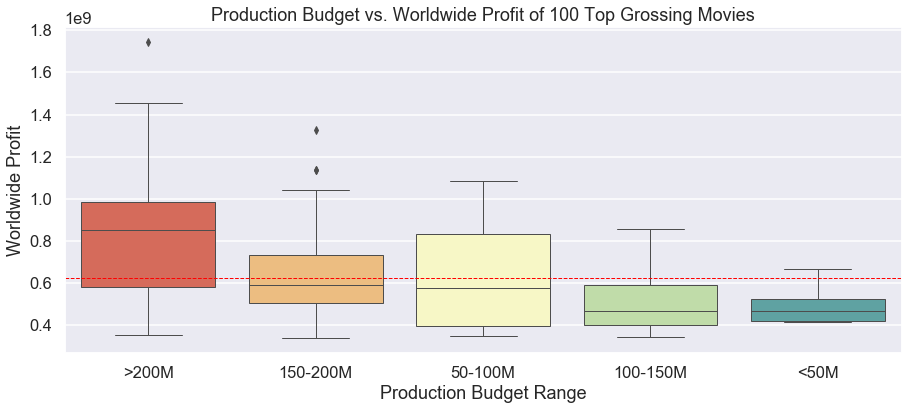

In [156]:
#set values
x_values = budget_range_vs_100_profit['budget_range']
y_values = budget_range_vs_100_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit of the top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#draw mean()
plt.axhline(budget_range_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Budget vs. Worldwide Profit of 100 Top Grossing Movies')
plt.xlabel('Production Budget Range')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [43]:
#save 
plt.savefig('budget_range_vs_100_profit.png')

<Figure size 432x288 with 0 Axes>

From the boxplot above, we observe that movies in the 50M-100M budget_range outperformed those in 100-150M. Once again, although the overall trend fall within the pattern of higher production budget = higher worldwide profit, many other factors besides investment budget can have an impact on the success of a movie.

Based on production budget alone, we recommend that our production budget for our future movie to be at least $150M.

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

### Genre

In [44]:
#genre_distribution values of all movies
y_values = full_df['genre'].value_counts(ascending=False)
x_values = y_values.index

y_values

Adventure              129
Comedy                 107
Action                 104
Drama                   96
Thriller/Suspense       80
Horror                  58
Romantic Comedy         22
Musical                 13
Black Comedy            12
Western                  5
Concert/Performance      3
Name: genre, dtype: int64

We can see here the movie industry is very Adventure-oriented as the majority of the movies made from 2010-2018 are in the Adventure genre. 

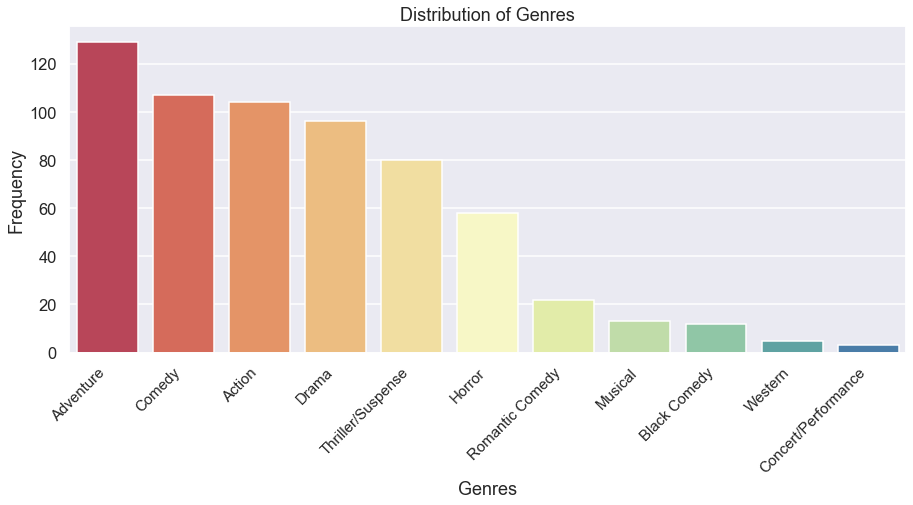

In [45]:
#plot genres distribution of the general dataset
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [46]:
#save
plt.savefig("genre_distribution.png")

<Figure size 432x288 with 0 Axes>

We see that Adventure, Comedy and Action are the most popular genres overall. Do the top 100 performers also follow this distribution?

In [172]:
#create sub dataframe 'genre' vs. 'worldwide_profit' of top 100 performers
genre_vs_100_profit = full_df[['genre', 'production_budget',
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
genre_vs_100_profit.head()

,genre,production_budget,worldwide_profit
1,Action,300000000,1744540523
16,Action,215000000,1454943967
31,Action,190000000,1327179709
59,Action,170000000,1138334005
21,Action,200000000,1136498912


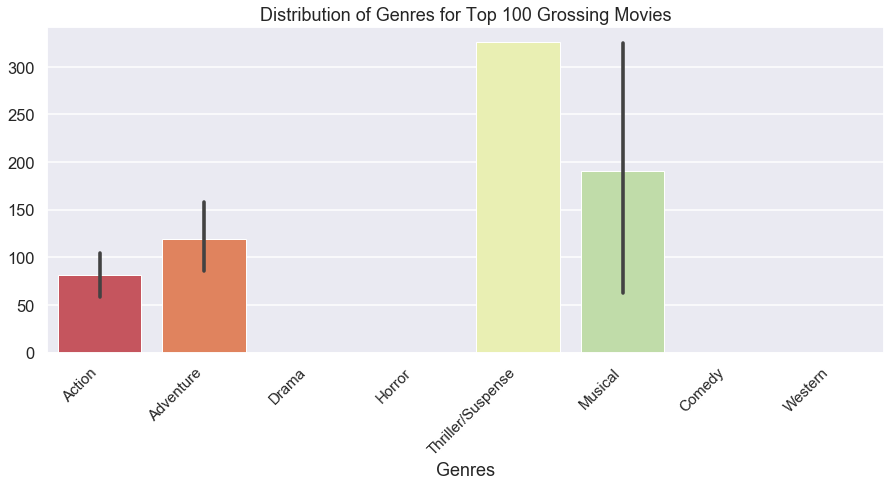

In [155]:
#plot 'genre' distribution of top 100 performers
x_values = genre_vs_100_profit['genre']
y_values = x_values.index
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres for Top 100 Grossing Movies')
plt.xlabel('Genre')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [49]:
#save
plt.savefig('genre_distribution_100.png')

<Figure size 432x288 with 0 Axes>

Suprisingly, for top 100 performers, Thriller/ Suspense and Musical are more popular. Adventure did not even make it into the top 3.

Let's visualize this in term of genre vs. worldwide_profit:

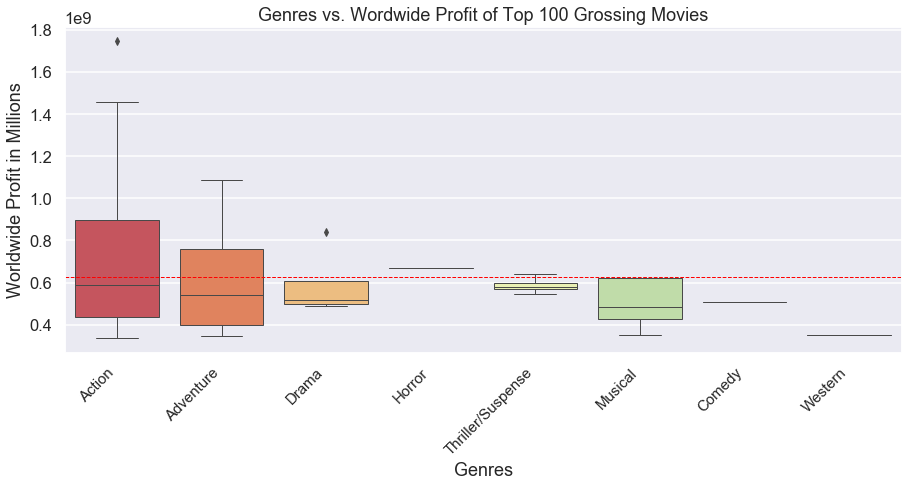

In [154]:
#plot 'genre' vs. 'worldwide_profit' of top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_profit['genre'], 
            y = genre_vs_100_profit['worldwide_profit'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Wordwide Profit of Top 100 Grossing Movies')
plt.xlabel('Genre')
plt.ylabel('Worldwide Profit in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [51]:
#save
plt.savefig('genre_vs_100_profit')

<Figure size 432x288 with 0 Axes>

Thriller/ Suspense might be more popular but Action and Adventure make more profits. 

Let's next investigate if their high profitability is correlated with their production budget.

In [174]:
#create sub dataframe 'genre' vs. 'production_budget' of top 100 performers
genre_vs_100_budget = full_df[['genre', 
                               'production_budget']].sort_values(by = 'production_budget', 
                                                                 ascending = False)[:100]
genre_vs_100_budget.head()

,genre,production_budget
0,Action,365000000
3,Action,300000000
1,Action,300000000
2,Action,300000000
5,Adventure,275000000


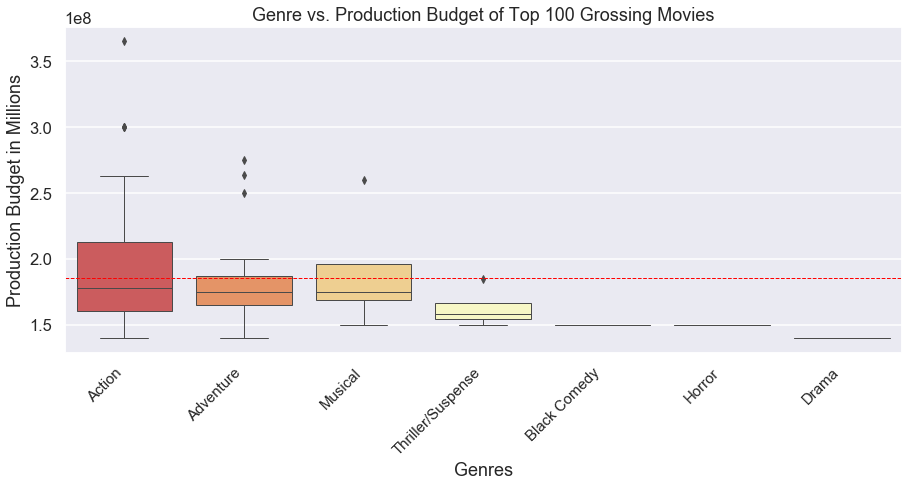

In [153]:
#plot 'genre' vs. 'production_budget' of top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_budget['genre'], 
            y = genre_vs_100_budget['production_budget'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_budget['production_budget'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Genres vs. Production Budget of Top 100 Grossing Movies')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [54]:
#save
plt.savefig('genre_vs_100_budget')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

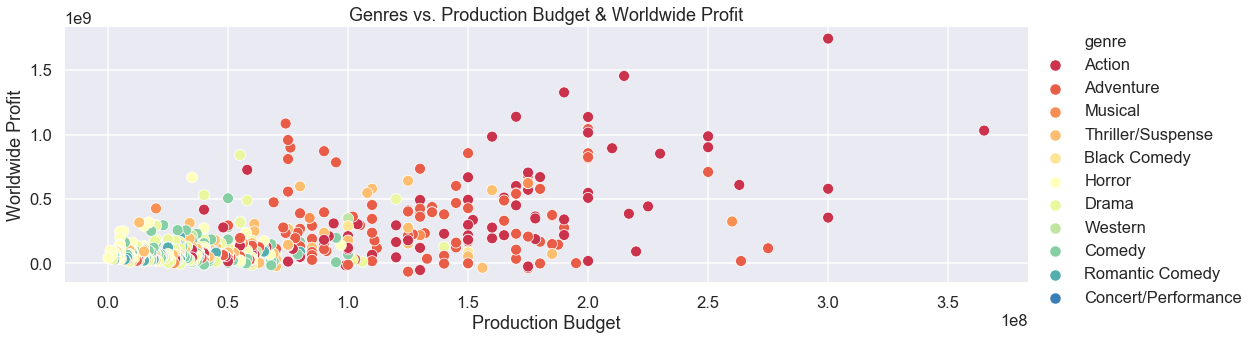

In [176]:
#plot all genres with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'genre',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [177]:
#save
plt.savefig('genre_budget_profit')

<Figure size 432x288 with 0 Axes>

We see that Action, Adventure are the most lucrative genres but also costs the most to create. 

It also makes sense why Thriller/ Suspense are the most popular genre: their production budget is lower compared to Action and Adventure. 

For genres, we recommend that the next movie is a mix of Action and Adventure.

Now we are taking a look at Source, Creative Type, Production Method in correlation with Profit. Let's look at the distribution of each of these.

### Source

In [55]:
#source_distribution values
y_values = full_df['source'].value_counts(ascending=False)
x_values = y_values.index

y_values

Original Screenplay                    308
Based on Fiction Book/Short Story      106
Based on Comic/Graphic Novel            45
Based on Real Life Events               41
Based on Factual Book/Article           33
Based on TV                             22
Based on Folk Tale/Legend/Fairytale     19
Based on Short Film                     13
Remake                                  11
Based on Game                           11
Spin-Off                                 9
Based on Religious Text                  4
Based on Play                            3
Based on Musical or Opera                2
Based on Toy                             2
Name: source, dtype: int64

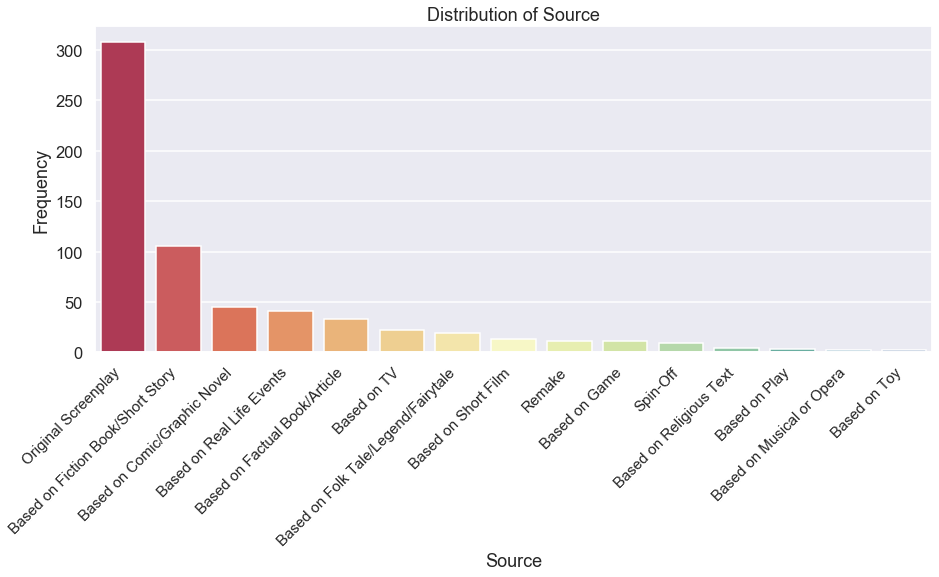

In [56]:
#plot distribution of 'source' for all movies
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [57]:
#save
plt.savefig('source_distribution')

<Figure size 432x288 with 0 Axes>

We see that Original Screenplay and Fictiona Book/ Short Story are the most popular. But just because they're popular sources doesn't mean that they generate the highest profit. Let's see which one performs the best by taking a look at source distribution for top 100 performers.

In [58]:
#create sub dataset for 'source' and 'worldwide_profit' for top 100 performers
soure_vs_100_profit = full_df[['source', 
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
soure_vs_100_profit.head()

,source,worldwide_profit
1,Based on Comic/Graphic Novel,1744540523
16,Based on Fiction Book/Short Story,1454943967
31,Original Screenplay,1327179709
59,Based on Fiction Book/Short Story,1138334005
21,Based on Comic/Graphic Novel,1136498912


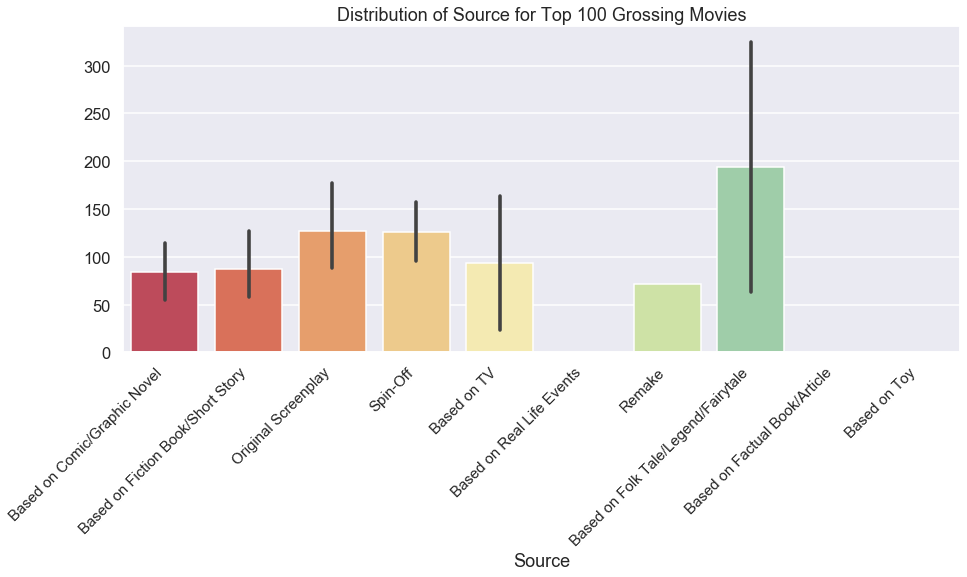

In [60]:
#plot 'source' distribution of top 100 performers
x_values = soure_vs_100_profit['source']
y_values = x_values.index
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources for Top 100 Grossing Movies')
plt.xlabel('Source')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [61]:
#save
plt.savefig('source_distribution_100')

<Figure size 432x288 with 0 Axes>

We can see here, again, by comparing the dataset with the distribution plot, just because movies based on Folk Tale/ Legend/ Fairytale is the most popular among top 100, they don't generate that highest profit. Let's look at this feature in term of worldwide_profit.

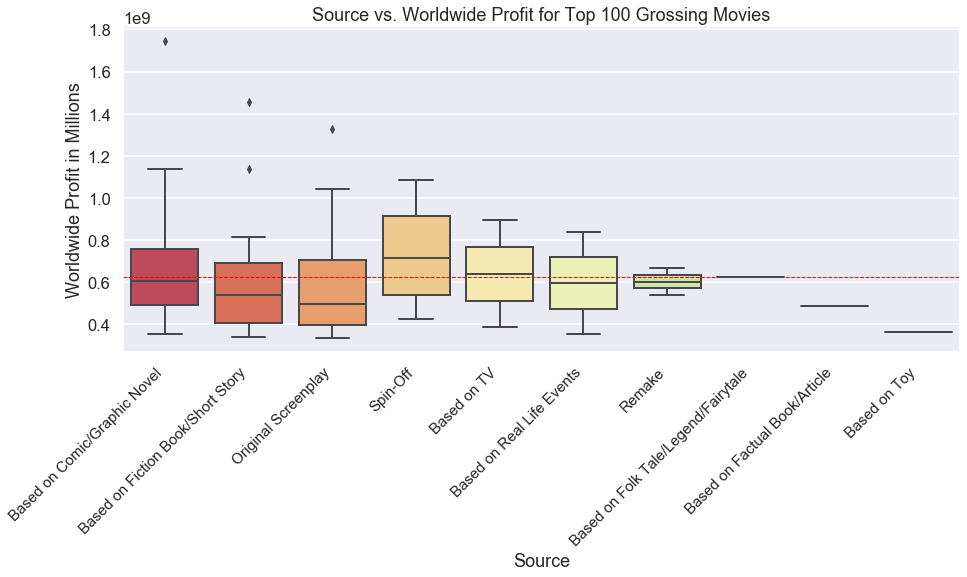

In [62]:
#plot 'source' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = soure_vs_100_profit['source'], 
            y = soure_vs_100_profit['worldwide_profit'], 
            palette = 'Spectral')

#draw mean()
plt.axhline(soure_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Source vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [63]:
#save
plt.savefig('soure_vs_100_profit')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

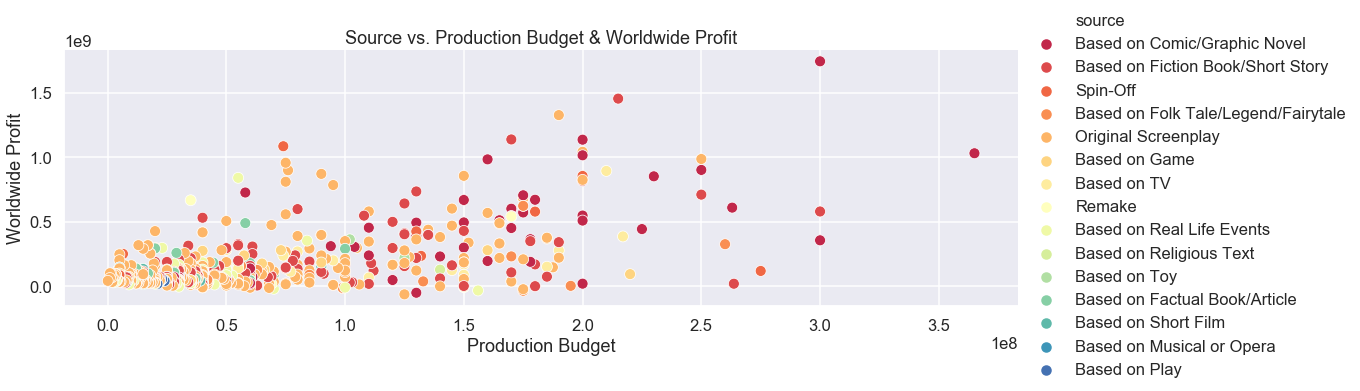

In [178]:
#plot all 'source' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'source',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Sources vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [179]:
#save
plt.savefig('source_budget_profit')

<Figure size 432x288 with 0 Axes>

For source, we recommend that our movie is to based on Comic/ Graphic Novel or Finction Book/ Short Story. This makes sense when our recommended genres are Action and Adventure. Superhero movies are doing very well statistically.

### Creative Type

Let's look at 'creative_type' for all movies:

In [64]:
#creative_type values
y_values = full_df['creative_type'].value_counts(ascending = False)
x_values = y_values.index

y_values

Contemporary Fiction       291
Kids Fiction                73
Science Fiction             67
Fantasy                     60
Dramatization               59
Historical Fiction          42
Super Hero                  33
Factual                      3
Multiple Creative Types      1
Name: creative_type, dtype: int64

Comtemporary Fiction is the most popular overall.

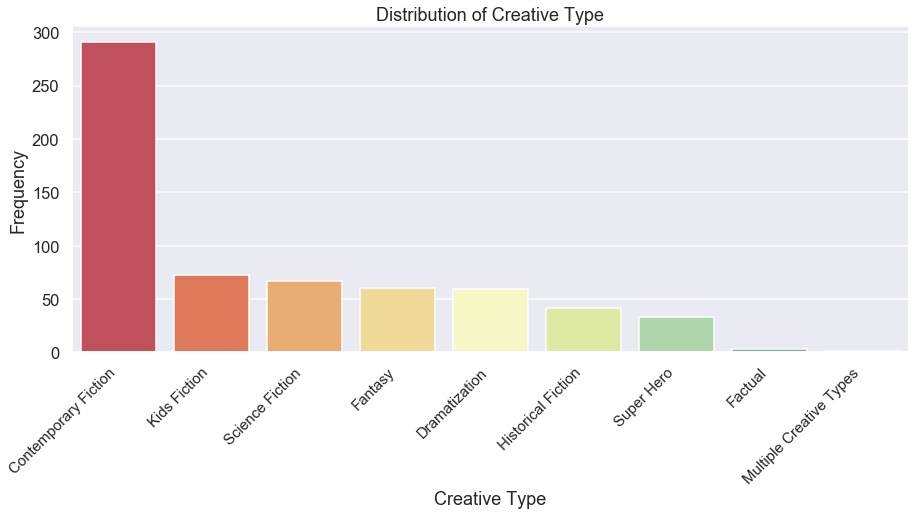

In [65]:
#plot 'creative_type' for all movies
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette='Spectral')

#set labels
plt.title('Distribution of Creative Types')
plt.xlabel('Creative Type')
plt.ylabel('Frequency')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [66]:
#save
plt.savefig('creative_type_distribution.png')

<Figure size 432x288 with 0 Axes>

Is this the same for top 100 performers?

In [67]:
#create sub dataset for 'creative_type' vs. 'worldwide_profit' for top 100 performers
creative_type_vs_100_profit = full_df[['creative_type', 
                                       'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                        ascending = False)[:100]
creative_type_vs_100_profit.head()

,creative_type,worldwide_profit
1,Super Hero,1744540523
16,Science Fiction,1454943967
31,Contemporary Fiction,1327179709
59,Science Fiction,1138334005
21,Super Hero,1136498912


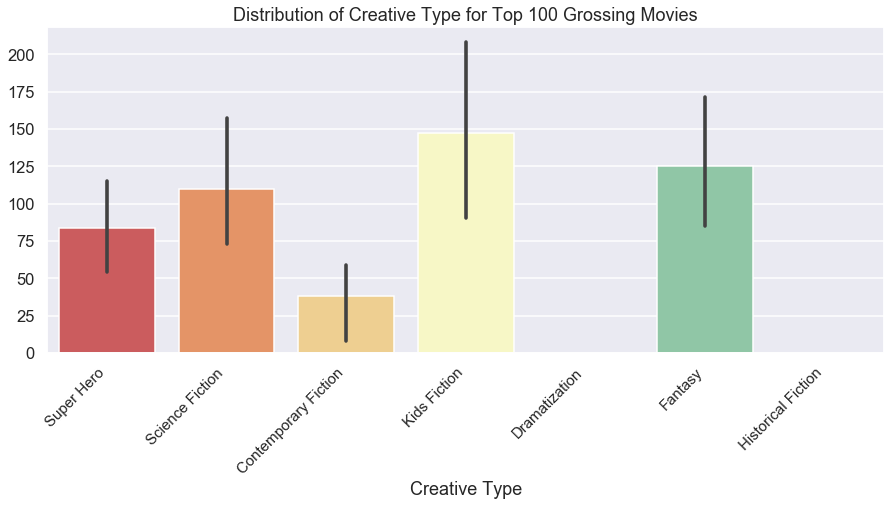

In [68]:
#plot distribution of 'creative_type' for top 100 performers
x_values = creative_type_vs_100_profit['creative_type']
y_values = x_values.index
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Creative Type for Top 100 Grossing Movies')
plt.xlabel('Creative Type')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

Now look at this in term of 'worldwide_profit'

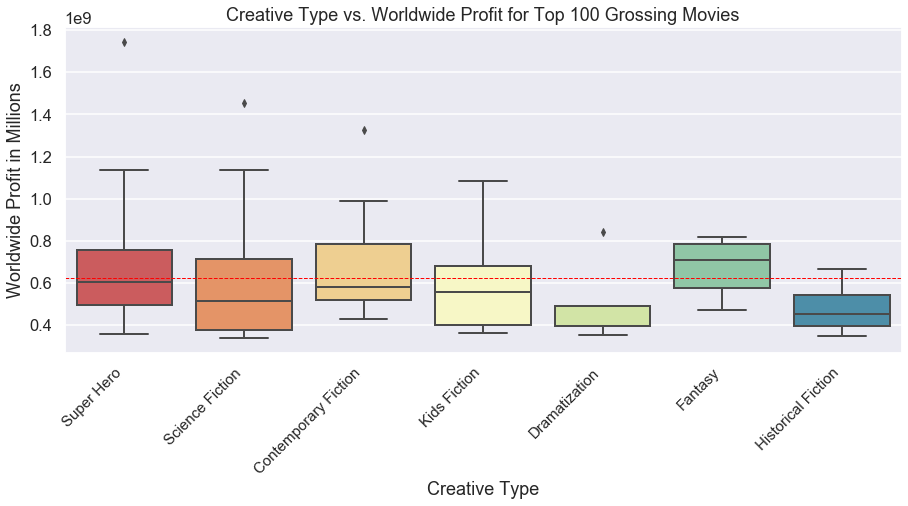

In [69]:
#plot 'creative_type' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = creative_type_vs_100_profit['creative_type'], 
            y = creative_type_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(creative_type_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Creative Type vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [70]:
#save
plt.savefig('creative_type_vs_100_profit')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

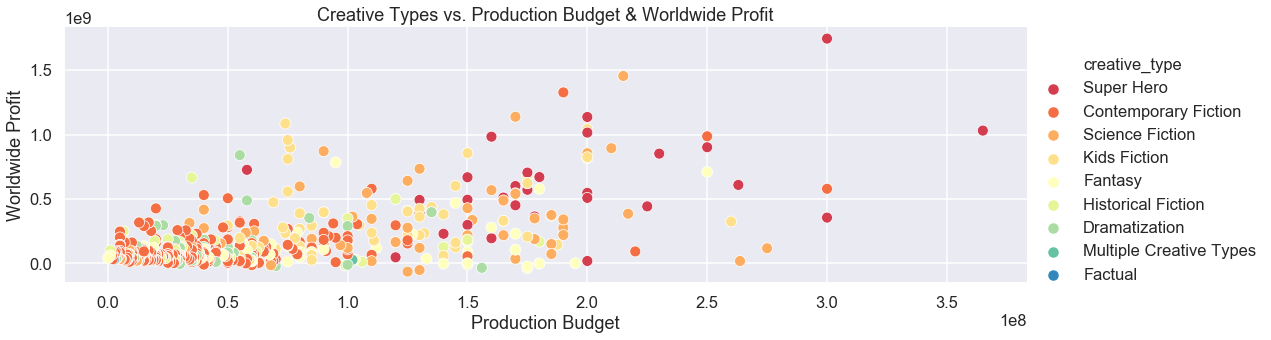

In [180]:
#plot all 'creative_type' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'production_budget', 
           y = 'worldwide_profit',
            hue = 'creative_type',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Creative Types vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [181]:
#save
plt.savefig('creative_type_budget_profit')

<Figure size 432x288 with 0 Axes>

As predicted, action + adventure + comic graphic/ novel + superhero is our success formula here.

### Distribution of Production Method

In [71]:
#production_method_distribution values for all movies
y_values = full_df['production_method'].value_counts(ascending = False)
x_values = y_values.index

y_values

Live Action              515
Digital Animation         57
Animation/Live Action     53
Stop-Motion Animation      4
Name: production_method, dtype: int64

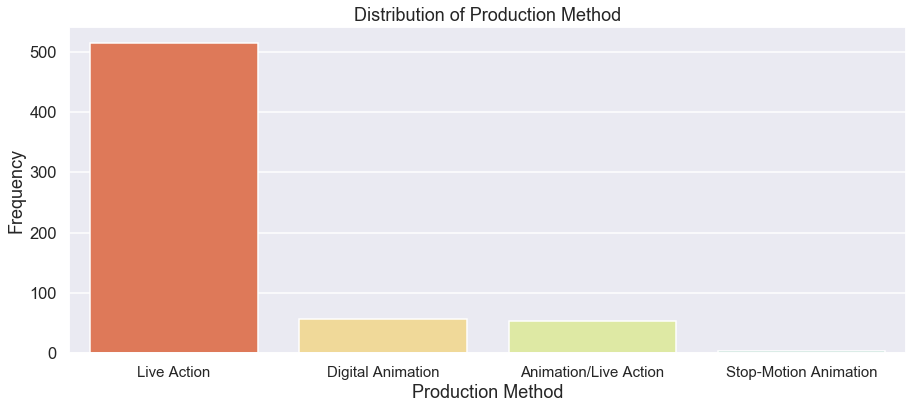

In [72]:
#plot distribution of 'production_method' for all movies
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods')
plt.xlabel('Production Method')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [73]:
#save
plt.savefig('production_method_distribution.png')

<Figure size 432x288 with 0 Axes>

Now we look at our 100 winners.

In [74]:
#create sub dataset for 'production_method' vs. 'worldwide_profit' for top 100 performers
production_method_vs_100_profit = full_df[['production_method', 
                                           'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                            ascending = False)[:100]
production_method_vs_100_profit.head()

,production_method,worldwide_profit
1,Animation/Live Action,1744540523
16,Live Action,1454943967
31,Live Action,1327179709
59,Live Action,1138334005
21,Live Action,1136498912


In [75]:
production_method_vs_100_profit.describe()

,worldwide_profit
count,1.000000e+02
mean,6.246844e+08
std,2.616154e+08
min,3.375923e+08
25%,4.231176e+08
50%,5.526732e+08
75%,7.287289e+08
max,1.744541e+09


For production method, general trend and top 100 performers are the same. Animation/ Live Action is it. Let's visualize this.

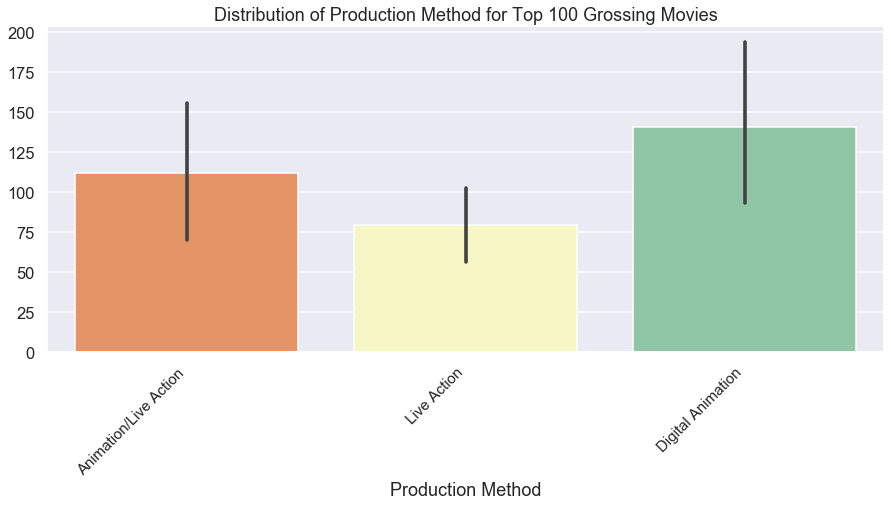

In [76]:
#plot distribution of 'production_method' for top 100 performers
x_values = production_method_vs_100_profit['production_method']
y_values = x_values.index
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods for Top 100 Grossing Movies')
plt.xlabel('Production Method')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [77]:
#save
plt.savefig('production_method_distribution_100')

<Figure size 432x288 with 0 Axes>

Again, in term of worldwide_profit:

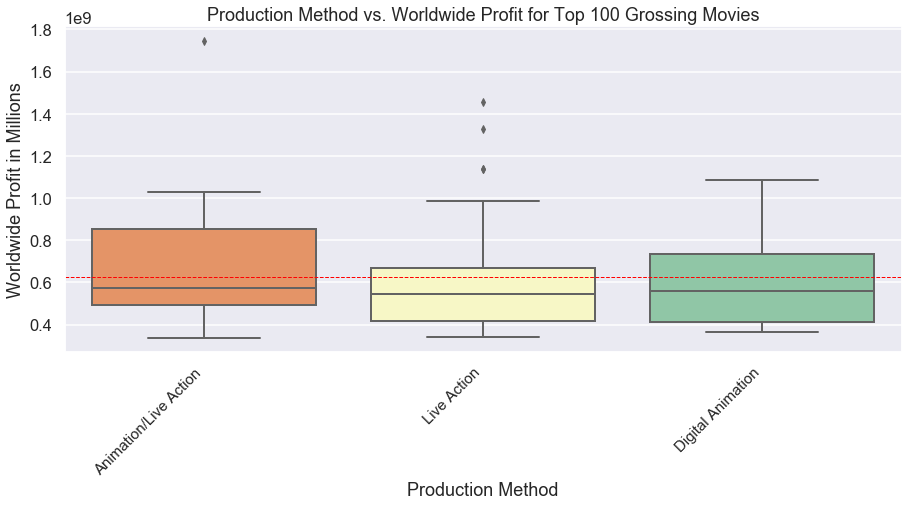

In [78]:
#plot 'production_method' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = production_method_vs_100_profit['production_method'], 
            y = production_method_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(production_method_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Methods vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [182]:
#save
plt.savefig('production_method_vs_100_profit')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

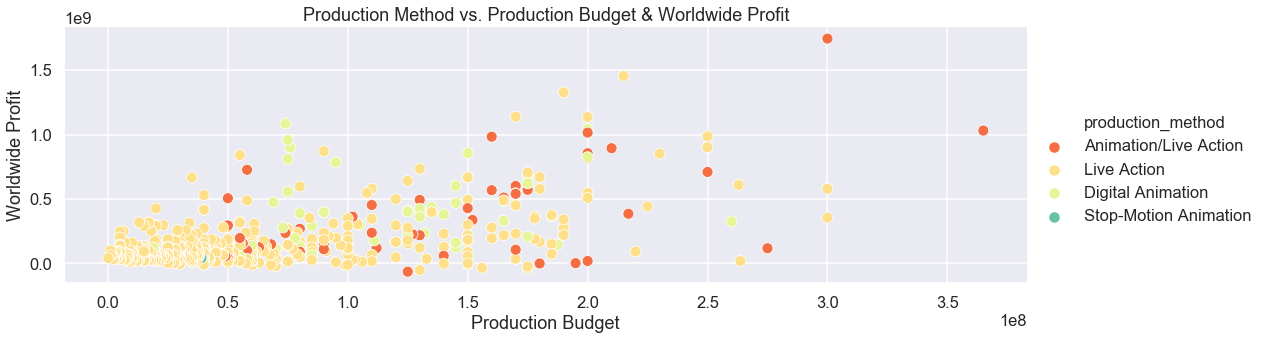

In [183]:
#plot all 'production_method' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'production_method',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Production Methods vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')

#show
plt.show()

## Question 3: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

Let's look at Rating, Number of Votes (num_votes), and also Studio (studio):

In [88]:
#get the attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range',
       'release_month', 'release_day'],
      dtype='object')

In [89]:
#create sub dataset for 'popularity' and 'average_rating'
#all movies
rating_vs_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes', 'worldwide_profit']]

#top 100 performers
rating_vs_100_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes',
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]


In [90]:
rating_vs_profit.head()

,movie,popularity,average_rating,num_votes,worldwide_profit
0,Avengers: Age of Ultron,44.383,7.3,665594,1031099202
1,Avengers: Infinity War,80.773,8.5,670926,1744540523
2,Justice League,34.953,6.5,329135,355945209
3,Spectre,30.318,6.8,352504,579500760
4,The Dark Knight Rises,26.220,8.4,1387769,852228107


Does having a high score in 'popularity' or 'average_rating' means higher profit?

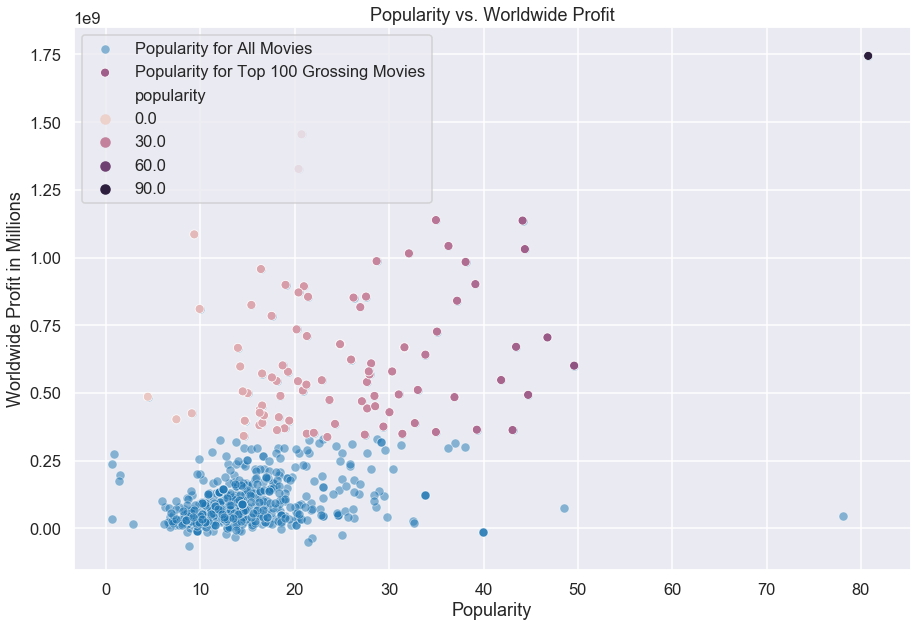

In [157]:
#plot 'popularity' vs. 'worldwide_profit'
plt.figure(figsize = (15, 10))

#popularity
ax1 = sns.scatterplot(x = rating_vs_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'Popularity for All Movies', alpha = 0.5)

ax2 = sns.scatterplot(x = rating_vs_100_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_profit['popularity'],
                      label = 'Popularity for Top 100 Grossing Movies')

#set labels
plt.title('Popularity vs. Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#show
plt.show()

In [158]:
#save
plt.savefig('popularity_vs_profit')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

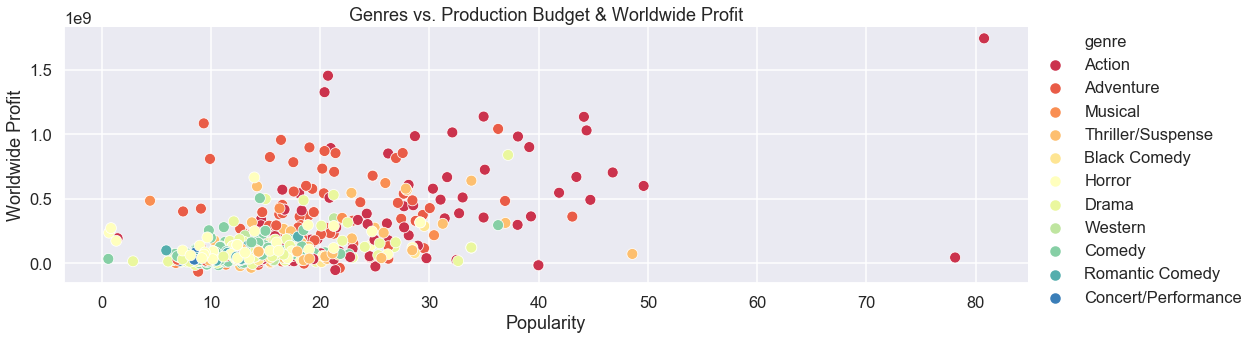

In [184]:
#plot all 'genre' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'popularity', 
           y = 'worldwide_profit',
            hue = 'genre',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [185]:
#save
plt.savefig('genre_popularity_profit')

<Figure size 432x288 with 0 Axes>

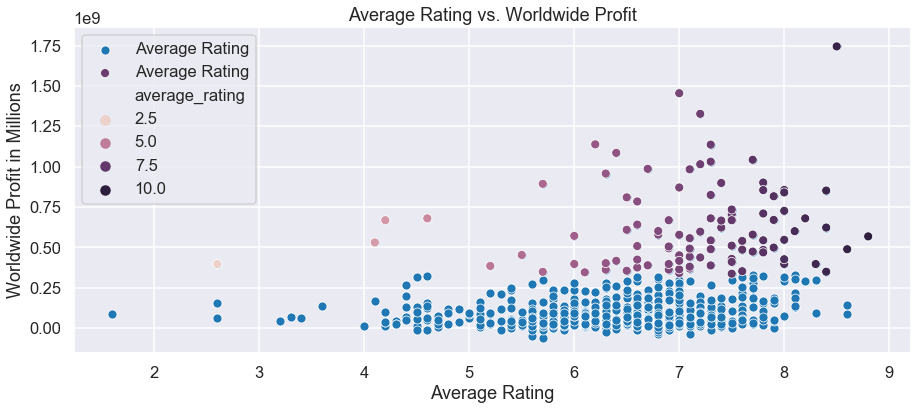

In [159]:
#plot 'average_rating' vs. 'worldwide_profit'
plt.figure(figsize = (15, 6))

#average_rating for all movies
ax1 = sns.scatterplot(x = rating_vs_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'Average Rating')

#average_rating for top 100 performers
ax1 = sns.scatterplot(x = rating_vs_100_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_100_profit['average_rating'],
                      label = 'Average Rating')

#set labels
plt.title('Average Rating vs. Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#show
plt.show()

In [94]:
#save
plt.savefig('average_rating_vs_profit')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

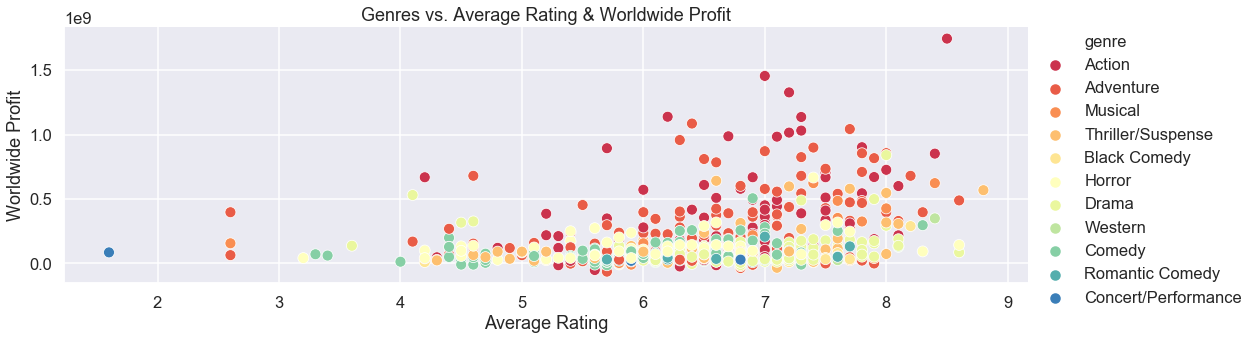

In [186]:
#plot all 'genre' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (20, 20))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'genre',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [187]:
#save
plt.savefig('genre_rating_profit')

<Figure size 432x288 with 0 Axes>